In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [29]:
data = pd.read_csv("FuelConsumption.csv")

fuel = pd.DataFrame(data)

fuel

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [27]:
fuel.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [30]:
x = fuel.drop(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS',
       'TRANSMISSION', 'FUEL', 'COEMISSIONS '], axis=1)
x

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION
0,1.6,4,10.5
1,1.6,4,9.8
2,3.2,6,13.7
3,3.5,6,15.0
4,1.8,4,11.4
...,...,...,...
634,2.4,5,14.4
635,2.4,5,13.6
636,2.3,5,13.9
637,2.3,5,13.0


In [31]:
y = fuel['COEMISSIONS ']
y

0      216
1      205
2      265
3      301
4      230
      ... 
634    288
635    274
636    274
637    260
638    299
Name: COEMISSIONS , Length: 639, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION
594,2.0,4,11.2
176,4.7,8,18.8
281,4.8,8,18.9
249,4.6,8,18.5
247,4.2,6,17.3
...,...,...,...
71,4.3,6,17.0
106,4.3,6,18.7
270,3.0,6,13.6
435,2.3,4,12.6


In [33]:
model = LinearRegression()
model

LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)
print(y_pred)

[282.69963516 356.94032136 286.11853875 511.46635506 289.39657506
 269.50156832 290.55548392 313.24170591 432.84717773 332.01166759
 225.98471124 241.30190554 313.95468479 225.98471124 250.3680899
 199.92110781 273.01278974 250.3680899  197.54483605 237.42716737
 282.88139353 342.9398351  308.06719161 245.35840207 324.27912315
 426.15726513 424.21989605 247.99181814 179.48785325 305.94806415
 308.96192886 278.93126943 385.19843818 344.95259012 303.14982161
 227.92208033 276.19148092 370.1383882  245.1766437  245.61554638
 305.94806415 197.80198036 587.0237493  264.7320929  379.84216551
 268.86397538 312.12368814 358.5141737  302.95113134 242.36146926
 289.39657506 255.92305284 304.39114371 289.93482287 312.12368814
 433.81730092 364.96387389 248.17357651 519.21583139 385.47251439
 377.88786453 343.63588209 352.70206645 230.73725477 308.0841235
 331.39100654 233.73418757 278.31060838 307.88543324 269.24442401
 220.17260399 373.77291395 327.27605596 234.7937513  370.77598114
 362.4058437

In [36]:
msc = mean_squared_error(y_test, y_pred)
msc

80.43725237508102

In [37]:
r_score = r2_score(y_test, y_pred)
r_score

0.9846361749926678

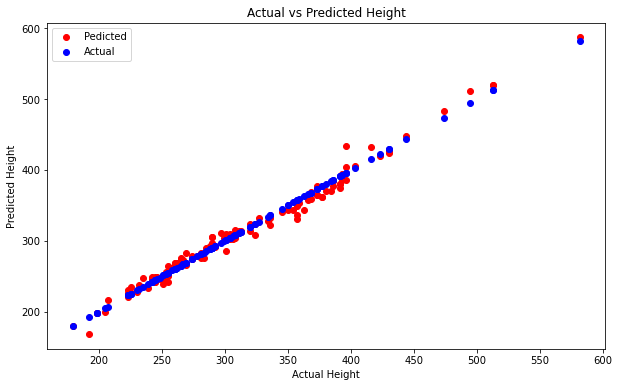

In [39]:
plt.figure(figsize=(10, 6))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.scatter(y_test, y_pred, color="red", label="Pedicted")
plt.scatter(y_test, y_test, color="blue", label="Actual")
plt.title("Actual vs Predicted Height")
plt.legend()
plt.show()